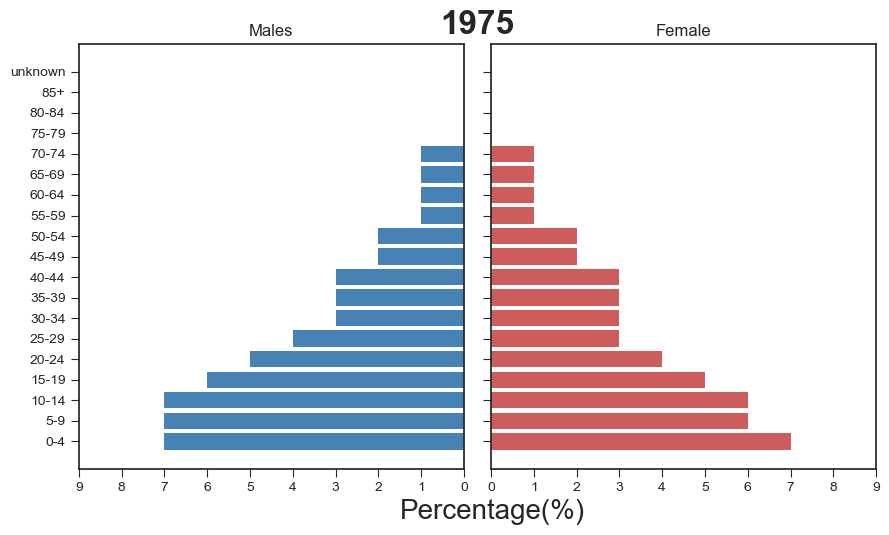

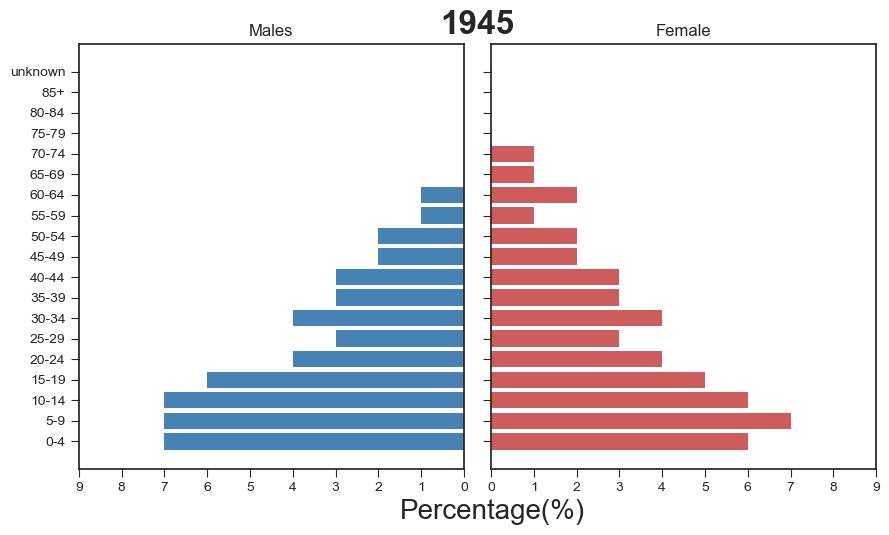

In [3]:
#mudule import
import os
from PyPDF2 import PdfReader
import re
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *
import PIL
from PIL import ImageTk
from PIL import Image

#text extraction
os.chdir("--YOUR PATH--") #example: C:\\Users\\Casper\\Desktop\\kaynaklar\\tiy
reader = PdfReader("İstatistik_Göstergeler_Türkiye_1923-2013.pdf")
page1 = reader.pages[17]
text = page1.extractText()
patern = r"\d{1,2},\d"

#repository
male_year35 = []
male_year40 = []
male_year45 = []
male_year50 = []
male_year55 = []
male_year60 = []
male_year65 = []
male_year70 = []
male_year75 = []
male_year80 = []
male_year85 = []
male_year90 = []
male_year2000 = []
male = (male_year35, male_year40, male_year45, male_year50, male_year55, male_year60, male_year65, male_year70, male_year75, male_year80, male_year85, male_year90, male_year2000)

female_year35 = []
female_year40 = []
female_year45 = []
female_year50 = []
female_year55 = []
female_year60 = []
female_year65 = []
female_year70 = []
female_year75 = []
female_year80 = []
female_year85 = []
female_year90 = []
female_year2000 = []
female = (female_year35, female_year40, female_year45, female_year50, female_year55, female_year60, female_year65, female_year70, female_year75, female_year80, female_year85, female_year90, female_year2000)
        
#total men-women shares elemination
first_half = [*range(260)]
first_half_updated = []
for i in first_half:
    if not i%10 == 0:
        first_half_updated.append(i)
        
#Data extraction
center =[*range(0,130,10)]
second_half = [*range(520)]
gear1 = 0
gear2 = 0
gear3 = 0

for gear2 in center:
    try:
        for gear1 in first_half_updated:
            if gear1 >= gear2 and gear1 < gear2+10:
                male[gear3].extend (str(round(float(re.findall(patern, text)[gear1].replace(",",".")))))
                
            elif gear1 >= gear2+130 and gear1 < gear2+130+10:
                female[gear3].extend (str(round(float(re.findall(patern, text)[gear1].replace(",",".")))))
                
                
        for gear1 in second_half:
            if gear1 >= gear2+260 and gear1 < gear2+260+10:
                male[gear3].extend (str(round(float(re.findall(patern, text)[gear1].replace(",",".")))))
                
            elif gear1 >= gear2+390 and gear1 < gear2+390+10:
                female[gear3].extend (str(round(float(re.findall(patern, text)[gear1].replace(",",".")))))
                
    finally:
        gear1 += 1
        gear2 += 10
        if gear3 == 13:
            break
        else: 
            gear3 += 1

#conversion to integer
def converter (maley, femaley):
    for i in range(0, len(maley)):
        maley[i] = int(maley[i])
        
    for i in range(0, len(femaley)):
        femaley[i] = int(femaley[i])
        
    return(maley, femaley)

#population pyramid display
def chart (maley, femaley, year):

        plt.style.use("seaborn-ticks")
        
        age = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+", "unknown"]
        age_reversed = list(reversed(age))
        y = range(0, len(age))
        
        fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 5))
        
        axes[0].barh(y, maley, color="steelblue")
        axes[0].set(title="Males")
        
        axes[1].barh(y, femaley, color="indianred")
        axes[1].set(title="Female")
        
        axes[0].set(yticks=y, yticklabels= age)
        
        x = [*range(10)]
        axes[0].set(xticks=x, xticklabels= x)
        axes[1].set(xticks=x, xticklabels= x)
        
        axes[0].invert_xaxis()
        
        plt.figtext(.495, 0.95, year, fontsize=24, weight="bold")
        plt.figtext(.45, -0.02, "Percentage(%)", fontsize=20)
        
        plt.tight_layout()
                
        plt.show()

#combined function for buttons
def combined (maley, femaley, year):
    converter (maley, femaley)
    return chart (maley, femaley, year)

#control panel
root = Tk()
root.geometry("100x350")

#buttons    
b1 = Button(root, text="1935", command = lambda: combined(male_year35, female_year35, 1935))
b1.pack()
b2 = Button(root, text="1940", command = lambda: combined(male_year40, female_year40, 1940))
b2.pack()
b3 = Button(root, text="1945", command = lambda: combined(male_year45, female_year45, 1945))
b3.pack()
b4 = Button(root, text="1950", command = lambda: combined(male_year50, female_year50, 1950))
b4.pack()
b5 = Button(root, text="1955", command = lambda: combined(male_year55, female_year55, 1955))
b5.pack()
b6 = Button(root, text="1960", command = lambda: combined(male_year60, female_year60, 1960))
b6.pack()
b7 = Button(root, text="1965", command = lambda: combined(male_year65, female_year65, 1965))
b7.pack()
b8 = Button(root, text="1970", command = lambda: combined(male_year70, female_year70, 1970))
b8.pack()
b9 = Button(root, text="1975", command = lambda: combined(male_year75, female_year75, 1975))
b9.pack()
b10 = Button(root, text="1980", command = lambda: combined(male_year80, female_year80, 1980))
b10.pack()
b11 = Button(root, text="1985", command = lambda: combined(male_year85, female_year85, 1985))
b11.pack()
b12 = Button(root, text="1990", command = lambda: combined(male_year90, female_year90, 1990))
b12.pack()
b13 = Button(root, text="2000", command = lambda: combined(male_year2000, female_year2000, 2000))
b13.pack()

root.mainloop()